In [2]:
pip install shapely


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install geopandas --user

  Using cached geopandas-0.13.2-py3-none-any.whl (1.1 MB)
  Using cached fiona-1.9.6-cp38-cp38-win_amd64.whl (22.9 MB)
  Using cached pyproj-3.5.0-cp38-cp38-win_amd64.whl (5.1 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
!pip install folium

In [24]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn')
%matplotlib inline

In [25]:
# Load the global temperature dataset and store it in a dataframe
orig_temp_data = pd.read_csv(r"C:\Users\ASUS\Downloads\archive\GlobalTemperatures.csv")
global_temp_df = orig_temp_data.copy()

global_temp_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


After observing the data, remove the data not required for the analysis and keep only the relevant data. The column 'LandAndOceanAverageTemperature' gives information about the overall earth temperature.

The global temperature dataset has monthly granularity. It can be resampled annually to reduce the number of entries, without losing the average temperature information.

In [26]:
# Choose the required columns
global_temp_df = global_temp_df[['dt', 'LandAndOceanAverageTemperature']]

# Set the date column as a DateTimeIndex and sort it
global_temp_df['dt'] = pd.to_datetime(global_temp_df['dt'])
global_temp_df.set_index('dt', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)

# Resample annually and rename index & columns
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
global_temp_df.index.rename('Year', inplace = True)
global_temp_df.index = global_temp_df.index.year

In [27]:
# Check the number of missing values and the corresponding years
print(global_temp_df.isnull().sum())
print(global_temp_df[global_temp_df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
            1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
            1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
            1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
            1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
            1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
            1849],
           dtype='int64', name='Year')


In [28]:
global_temp_df.dropna(inplace = True)

In climate science, temperature anomaly represents temperature pattern accurately than absolute temperature. It is a measure of the departure from baseline temperature. Basically, it indicates how much warmer or cooler it is than the baseline. The baseline used here is the average temperature over the 30 year period 1951-1980 (base period used by NASA).

The temperature anomaly values are stored in a new column in the dataframe and the absolute temperature values are dropped

In [29]:
# Calculate the global baseline temperature
global_ref_temp = global_temp_df.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
global_temp_df['Temperature Anomaly'] = global_temp_df['AnnualAverageTemp'] - global_ref_temp
global_temp_df.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

global_temp_df.head()

,Temperature Anomaly
Year,
1850,-0.432381
1851,-0.307714
1852,-0.293047
1853,-0.344381
1854,-0.308547


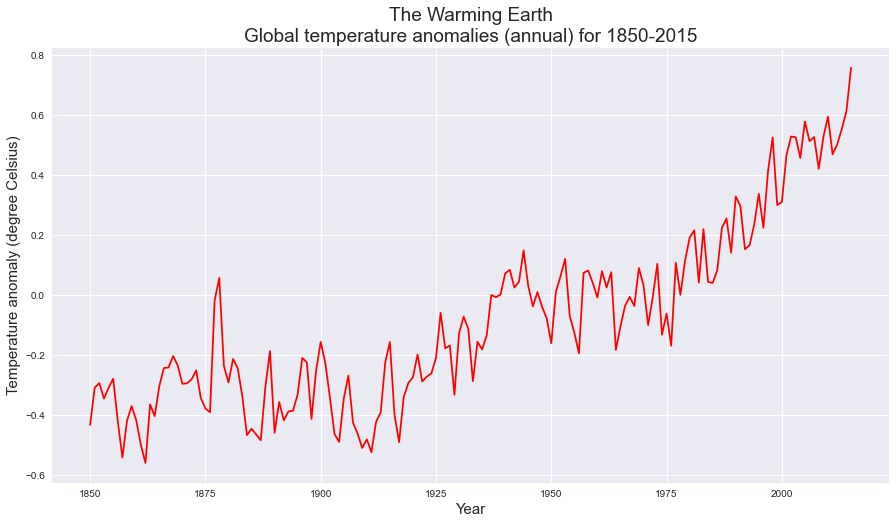

In [30]:
# Plot the temperature anomaly
plt.figure(figsize = (15, 8))

plt.plot(global_temp_df['Temperature Anomaly'], 'r')

plt.title('The Warming Earth\nGlobal temperature anomalies (annual) for 1850-2015', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.show()

Plotting the temperature anomaly over the years, clearly indicates the warming of Earth. The warming is more pronounced from about 1920 onwards. In 2015, the Earth is 0.76 degree Celsius warmer than the normal. The result above confirms the scientific consensus that the Earth is warming.

Natural disasters
Let's explore the natural disaster data and analyse how the occurrence of various types of natural disasters has changed over the years.

In [77]:
# Load the natural disaster dataset and store it in a dataframe
orig_disaster_data = pd.read_csv(r"C:\Users\ASUS\Downloads\natural-disasters-by-type.csv")
nat_disaster_df = orig_disaster_data.copy()

nat_disaster_df.head()

,Entity,Code,Year,Number of reported natural disasters
0,All disasters,NaN,1970,83
1,All disasters,NaN,1971,67
2,All disasters,NaN,1972,69
3,All disasters,NaN,1973,76
4,All disasters,NaN,1974,75


In [78]:
# Remove the 'Code' column
nat_disaster_df.drop(['Code'], axis = 1, inplace = True)

nat_disaster_df.head()

,Entity,Year,Number of reported natural disasters
0,All disasters,1970,83
1,All disasters,1971,67
2,All disasters,1972,69
3,All disasters,1973,76
4,All disasters,1974,75


In [79]:
# Check the different types of 'Entity' values
nat_disaster_df['Entity'].unique()

array(['All disasters', 'All disasters excluding earthquakes',
       'All disasters excluding extreme temperature', 'Drought',
       'Dry mass movement', 'Earthquake', 'Extreme temperature',
       'Extreme weather', 'Flood', 'Glacial lake outburst flood',
       'Volcanic activity', 'Wet mass movement', 'Wildfire'], dtype=object)

The 'Entity' column contains 10 types of natural disaster entries and their summation, 'All natural disasters'. For further analysis it is suitable to rearrange the data according to the disaster categories.

In [80]:
# Pivot the dataframe
nat_disaster_df = nat_disaster_df.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters')
nat_disaster_df.head()

Entity,All disasters,All disasters excluding earthquakes,All disasters excluding extreme temperature,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Glacial lake outburst flood,Volcanic activity,Wet mass movement,Wildfire
Year,,,,,,,,,,,,,
1970,83.0,71.0,83.0,9.0,NaN,12.0,NaN,24.0,31.0,NaN,NaN,6.0,1.0
1971,67.0,61.0,66.0,14.0,NaN,6.0,1.0,22.0,15.0,NaN,3.0,6.0,NaN
1972,69.0,62.0,67.0,14.0,NaN,7.0,2.0,26.0,15.0,NaN,NaN,5.0,NaN
1973,76.0,68.0,73.0,15.0,NaN,8.0,3.0,22.0,20.0,NaN,1.0,5.0,2.0
1974,75.0,69.0,75.0,13.0,NaN,6.0,NaN,28.0,18.0,NaN,NaN,10.0,NaN


In [81]:

nat_disaster_df.head()

Entity,All disasters,All disasters excluding earthquakes,All disasters excluding extreme temperature,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Glacial lake outburst flood,Volcanic activity,Wet mass movement,Wildfire
Year,,,,,,,,,,,,,
1970,83.0,71.0,83.0,9.0,NaN,12.0,NaN,24.0,31.0,NaN,NaN,6.0,1.0
1971,67.0,61.0,66.0,14.0,NaN,6.0,1.0,22.0,15.0,NaN,3.0,6.0,NaN
1972,69.0,62.0,67.0,14.0,NaN,7.0,2.0,26.0,15.0,NaN,NaN,5.0,NaN
1973,76.0,68.0,73.0,15.0,NaN,8.0,3.0,22.0,20.0,NaN,1.0,5.0,2.0
1974,75.0,69.0,75.0,13.0,NaN,6.0,NaN,28.0,18.0,NaN,NaN,10.0,NaN


There are several 'NaN' values which could mean missing values or unreported disaster occurrences. For our analysis, we'll replace them with 0, which means no disaster occurrence and it would also benefit plotting the data.

In [82]:
# Handle missing values and rename columns
nat_disaster_df.fillna(value = 0, inplace = True)
nat_disaster_df = nat_disaster_df.add_suffix(' (Occurrence)')
nat_disaster_df.head()

Entity,All disasters (Occurrence),All disasters excluding earthquakes (Occurrence),All disasters excluding extreme temperature (Occurrence),Drought (Occurrence),Dry mass movement (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Glacial lake outburst flood (Occurrence),Volcanic activity (Occurrence),Wet mass movement (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,,,,
1970,83.0,71.0,83.0,9.0,0.0,12.0,0.0,24.0,31.0,0.0,0.0,6.0,1.0
1971,67.0,61.0,66.0,14.0,0.0,6.0,1.0,22.0,15.0,0.0,3.0,6.0,0.0
1972,69.0,62.0,67.0,14.0,0.0,7.0,2.0,26.0,15.0,0.0,0.0,5.0,0.0
1973,76.0,68.0,73.0,15.0,0.0,8.0,3.0,22.0,20.0,0.0,1.0,5.0,2.0
1974,75.0,69.0,75.0,13.0,0.0,6.0,0.0,28.0,18.0,0.0,0.0,10.0,0.0


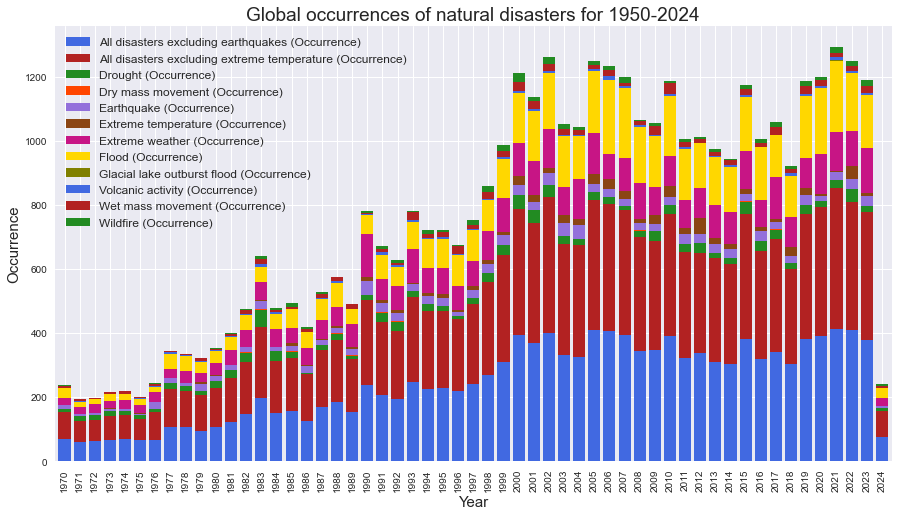

In [85]:
# Plot the types of natural disasters occurrences for 1950-2018
colors = ['#4169e1', '#b22222', '#228b22', '#ff4500', '#9370db', '#8b4513', '#c71585', '#ffd700', 'olive']

nat_disaster_df.drop(['All disasters (Occurrence)'], axis = 1).loc[1950:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2024', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

The bar plot above with individual stacks for each disaster category shows that the occurrence of floods has significantly increased over the years relative to other disasters. The next highest increase in occurrence is that of extreme weather followed by earthquakes. The plot also shows that there has been a steady increase in the number of total natural disasters globally. This is more evident from the plot below.


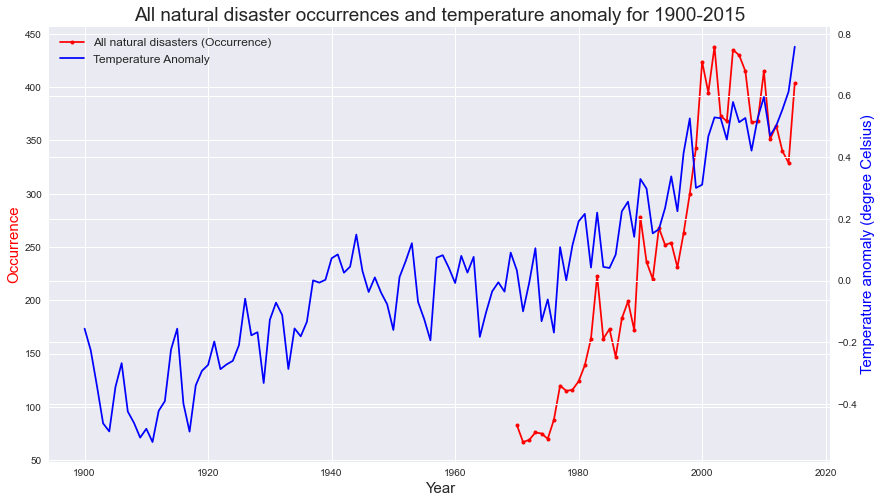

In [86]:
# Plot all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(nat_disaster_df.loc[:2015, 'All disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(global_temp_df.loc[1900:, 'Temperature Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2015', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()

The above plot indicates a positive correlation between temperature anomaly and the occurrence of natural disasters. Especially after around 1940 when it starts becoming warmer than the normal, natural disasters also start rising globally.

Let's also investigate the economic damage caused by natural disasters.

In [97]:
# Load the economic damage dataset and store it in a dataframe
orig_econ_data = pd.read_csv(r"C:\Users\ASUS\Downloads\economic-damage-from-natural-disasters.csv")
econ_dmg_df = orig_econ_data.copy()

econ_dmg_df.head()

,Entity,Code,Year,Total economic damage from natural disasters
0,All disasters,NaN,1900,30000000
1,All disasters,NaN,1901,0
2,All disasters,NaN,1902,25000000
3,All disasters,NaN,1903,480000000
4,All disasters,NaN,1904,0


In [98]:
# Remove the 'Code' column
econ_dmg_df.drop(['Code'], axis = 1, inplace = True)

econ_dmg_df.head()

,Entity,Year,Total economic damage from natural disasters
0,All disasters,1900,30000000
1,All disasters,1901,0
2,All disasters,1902,25000000
3,All disasters,1903,480000000
4,All disasters,1904,0


In [99]:
# Pivot the dataframe
econ_dmg_df = econ_dmg_df.pivot(index = 'Year', columns = 'Entity', values = 'Total economic damage from natural disasters')
econ_dmg_df.head()

Entity,All disasters,All disasters excluding earthquakes,All disasters excluding extreme temperature,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Fog,Glacial lake outburst flood,Volcanic activity,Wet mass movement,Wildfire
Year,,,,,,,,,,,,,,
1900,30000000.0,30000000.0,30000000.0,0.0,NaN,0.0,NaN,30000000.0,0.0,NaN,NaN,0.0,NaN,NaN
1901,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,25000000.0,0.0,25000000.0,NaN,NaN,25000000.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
1903,480000000.0,480000000.0,480000000.0,0.0,0.0,0.0,NaN,0.0,480000000.0,NaN,NaN,0.0,NaN,NaN
1904,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:

econ_dmg_df.fillna(value = 0, inplace = True)
econ_dmg_df = econ_dmg_df.add_suffix(' (Economic Damage)')

econ_dmg_df.head()

Entity,All disasters (Economic Damage),All disasters excluding earthquakes (Economic Damage),All disasters excluding extreme temperature (Economic Damage),Drought (Economic Damage),Dry mass movement (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Fog (Economic Damage),Glacial lake outburst flood (Economic Damage),Volcanic activity (Economic Damage),Wet mass movement (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,
1900,30000000.0,30000000.0,30000000.0,0.0,0.0,0.0,0.0,30000000.0,0.0,0.0,0.0,0.0,0.0,0.0
1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,25000000.0,0.0,25000000.0,0.0,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,480000000.0,480000000.0,480000000.0,0.0,0.0,0.0,0.0,0.0,480000000.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


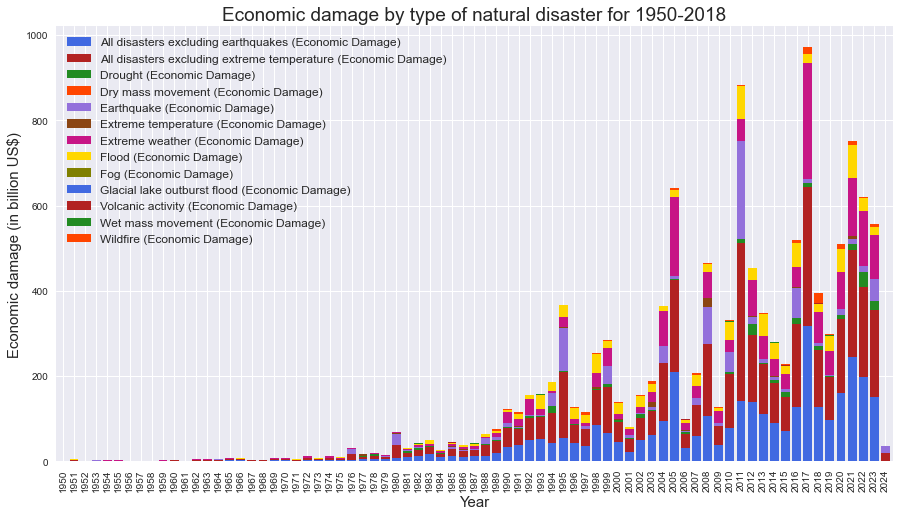

In [103]:
# Plot the economic damage categorised by the type of natural disasters for 1950-2018
((econ_dmg_df.drop(['All disasters (Economic Damage)'], axis = 1).loc[1950:]) / 1e9).plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Economic damage by type of natural disaster for 1950-2018', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Economic damage (in billion US$)', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

Economic damage is highly variable as it depends on several factors such as the disaster type, disaster location, severity of the disaster, disaster management efforts, etc.

However, one key trend that stands out from the plot is that the total economic damage from all the disasters is generally increasing over the years. The main reason is the increase in disaster occurrences (correlated with global temperature rise), although all disasters don't contribute equally to the economic damage. Another reason for higher economic damage could be the overall increase in economic growth which leads to more infrastructure, land use, etc.

Combine the three main dataframes (global_temp_df, nat_disaster_df and econ_dmg_df) and create a correlation table to measure the correlation between each entity.

In [104]:
combined_df = global_temp_df.join([nat_disaster_df, econ_dmg_df], how = 'inner')
combined_df.head()

,Temperature Anomaly,All disasters (Occurrence),All disasters excluding earthquakes (Occurrence),All disasters excluding extreme temperature (Occurrence),Drought (Occurrence),Dry mass movement (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),...,Dry mass movement (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Fog (Economic Damage),Glacial lake outburst flood (Economic Damage),Volcanic activity (Economic Damage),Wet mass movement (Economic Damage),Wildfire (Economic Damage)
Year,,,,,,,,,,,,,,,,,,,,,
1970,0.033119,83.0,71.0,83.0,9.0,0.0,12.0,0.0,24.0,31.0,...,0.0,6.017500e+08,0.0,1.064974e+09,1.307770e+09,0.0,0.0,0.0,0.0,100000000.0
1971,-0.099547,67.0,61.0,66.0,14.0,0.0,6.0,1.0,22.0,15.0,...,0.0,8.360000e+08,100000000.0,2.083890e+08,5.563000e+08,0.0,0.0,2000000.0,0.0,0.0
1972,-0.006631,69.0,62.0,67.0,14.0,0.0,7.0,2.0,26.0,15.0,...,0.0,1.166000e+09,0.0,2.602920e+09,4.344930e+08,0.0,0.0,0.0,0.0,0.0
1973,0.105203,76.0,68.0,73.0,15.0,0.0,8.0,3.0,22.0,20.0,...,0.0,1.240000e+07,0.0,5.392000e+08,1.730993e+09,0.0,0.0,24700000.0,0.0,0.0
1974,-0.131464,75.0,69.0,75.0,13.0,0.0,6.0,0.0,28.0,18.0,...,0.0,1.325500e+07,0.0,3.123017e+09,8.674720e+08,0.0,0.0,0.0,21700000.0,0.0


In [105]:
correlation_table = combined_df.corr()
correlation_table.head()

,Temperature Anomaly,All disasters (Occurrence),All disasters excluding earthquakes (Occurrence),All disasters excluding extreme temperature (Occurrence),Drought (Occurrence),Dry mass movement (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),...,Dry mass movement (Economic Damage),Earthquake (Economic Damage),Extreme temperature (Economic Damage),Extreme weather (Economic Damage),Flood (Economic Damage),Fog (Economic Damage),Glacial lake outburst flood (Economic Damage),Volcanic activity (Economic Damage),Wet mass movement (Economic Damage),Wildfire (Economic Damage)
Temperature Anomaly,1.000000,0.905439,0.903513,0.902416,0.443408,0.032563,0.676599,0.758877,0.819429,0.882506,...,0.177357,0.246633,0.214446,0.561779,0.635533,NaN,NaN,0.010970,0.119790,0.504911
All disasters (Occurrence),0.905439,1.000000,0.998573,0.998294,0.510956,0.092919,0.738419,0.822225,0.902875,0.958816,...,0.101755,0.259366,0.222765,0.588157,0.607700,NaN,NaN,-0.059232,0.197458,0.470815
All disasters excluding earthquakes (Occurrence),0.903513,0.998573,1.000000,0.996361,0.508790,0.082171,0.701354,0.826001,0.892481,0.966879,...,0.099154,0.253095,0.219135,0.586407,0.605286,NaN,NaN,-0.058033,0.196016,0.469570
All disasters excluding extreme temperature (Occurrence),0.902416,0.998294,0.996361,1.000000,0.515592,0.104573,0.743571,0.787587,0.912239,0.953464,...,0.104327,0.262532,0.230520,0.576776,0.609503,NaN,NaN,-0.054432,0.207115,0.468641
Drought (Occurrence),0.443408,0.510956,0.508790,0.515592,1.000000,0.241063,0.395443,0.366431,0.385181,0.372066,...,-0.111795,0.006466,-0.020921,0.160226,0.186690,NaN,NaN,0.170053,0.391266,0.085781


A value of 1.0 implies perfect positive correlation, -1.0 implies perfect negative correlation and 0 means no correlation between the two entities. Let's see how temperature anomaly compares to everything.

In [106]:
# Correlation with respect to temperature anomaly
combined_df.corr()['Temperature Anomaly']

Temperature Anomaly                                              1.000000
All disasters (Occurrence)                                       0.905439
All disasters excluding earthquakes (Occurrence)                 0.903513
All disasters excluding extreme temperature (Occurrence)         0.902416
Drought (Occurrence)                                             0.443408
Dry mass movement (Occurrence)                                   0.032563
Earthquake (Occurrence)                                          0.676599
Extreme temperature (Occurrence)                                 0.758877
Extreme weather (Occurrence)                                     0.819429
Flood (Occurrence)                                               0.882506
Glacial lake outburst flood (Occurrence)                              NaN
Volcanic activity (Occurrence)                                   0.467152
Wet mass movement (Occurrence)                                   0.621059
Wildfire (Occurrence)                 

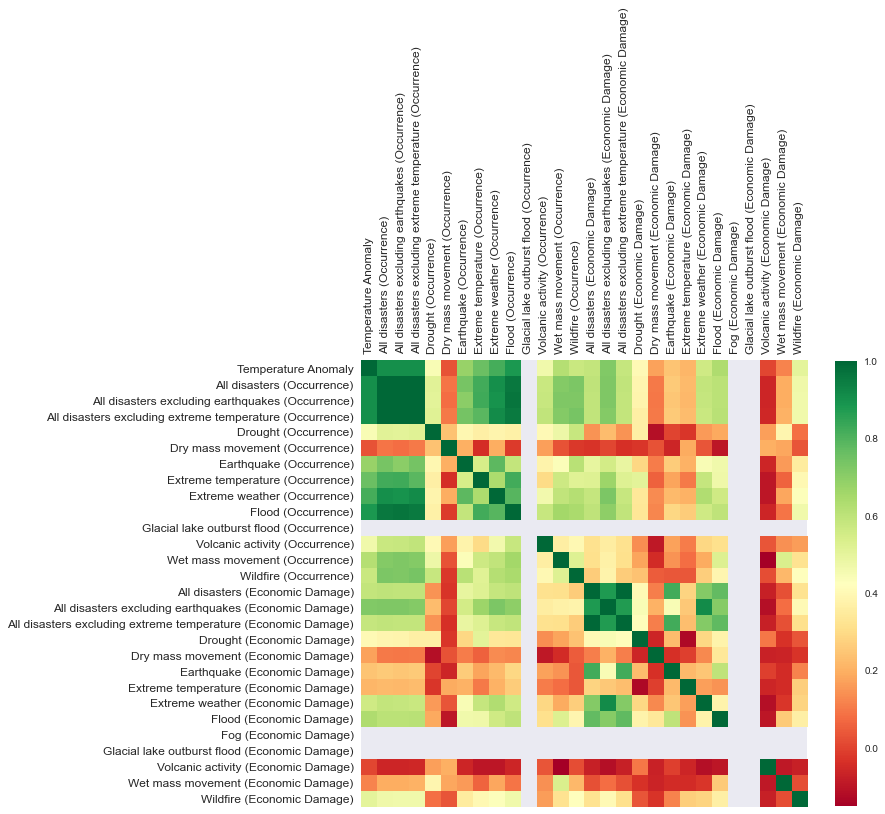

In [107]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

plt.show()

The heatmap and the correlation values confirm our analysis from the previous plots that global temperature rise has a strong positive correlation with all types of natural disaster occurrences (except mass movement (dry)) and has a relatively lower correlation with economic damage.